In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import mygene

# Analysis of TCGA Tumor vs Normal Matched Negative Control 

Using data produced from this experiment: <br>
https://github.com/jvivian/rnaseq-recompute-analysis/blob/master/experiments/tcga_matched_negative_control.py

### Number of Samples

In [2]:
def zip_sort(x, y):
    vals = sorted(zip(x, y), key=lambda x: x[1])
    return zip(*vals)

def label_fix(l):
    return [x.replace('_', '\n').capitalize() for x in l]

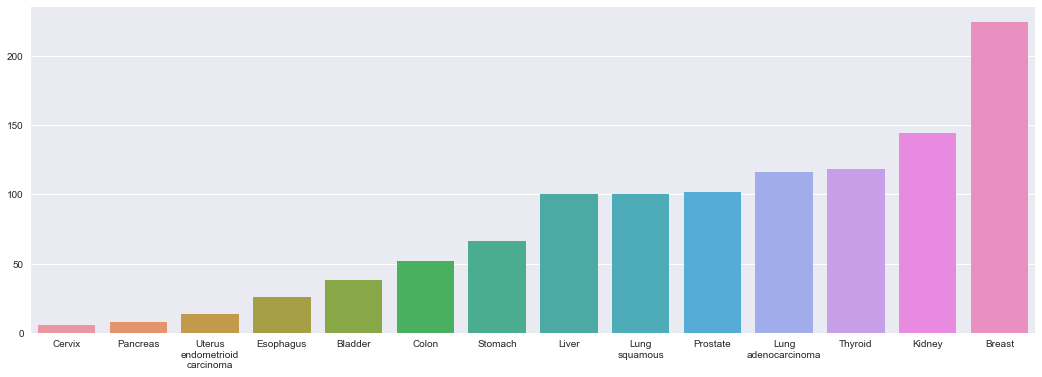

In [3]:
vector_names = [x.split('-vector')[0].replace('_', '\n').capitalize() for x in os.listdir('vectors/') if '-vector' in x]
num_samples = [len(open(os.path.join('vectors', x)).readlines()) for x in os.listdir('vectors/') if '-vector' in x]

vector_names, num_samples = zip_sort(vector_names, num_samples)

fig, ax = plt.subplots(figsize=[18,6])
sns.barplot(vector_names, num_samples, ax=ax);

### Significant Genes

In [9]:
result_paths = [x for x in os.listdir('results') if '.tsv' in x]
results_neg = {}
for result in result_paths:
    results_neg[result.split('-')[0]] = pd.read_csv(os.path.join('results', result), index_col=0, sep='\t')
    
result_paths = [x for x in os.listdir('../tcga-matched/results') if '.tsv' in x]
results = {}
for result in result_paths:
    results[result.split('-')[0]] = pd.read_csv(os.path.join('../tcga-matched/results', result), index_col=0, sep='\t')

In [36]:
sig_genes = {x: results[x][results[x].padj < 0.001].index for x in sorted(results.keys())}
sig_genes_neg = {x: results_neg[x][results_neg[x].padj < 0.001].index for x in sorted(results.keys())}

df = pd.DataFrame()
df['tissues'] = label_fix(sorted(results)) * 2 
df['sig_genes'] = [np.log2(len(sig_genes[x])) for x in sorted(sig_genes)] + [np.log2(len(sig_genes_neg[x])) for x in sorted(sig_genes)]
df['type'] = ['Control'] * len(sig_genes) + ['Negative Control'] * len(sig_genes)

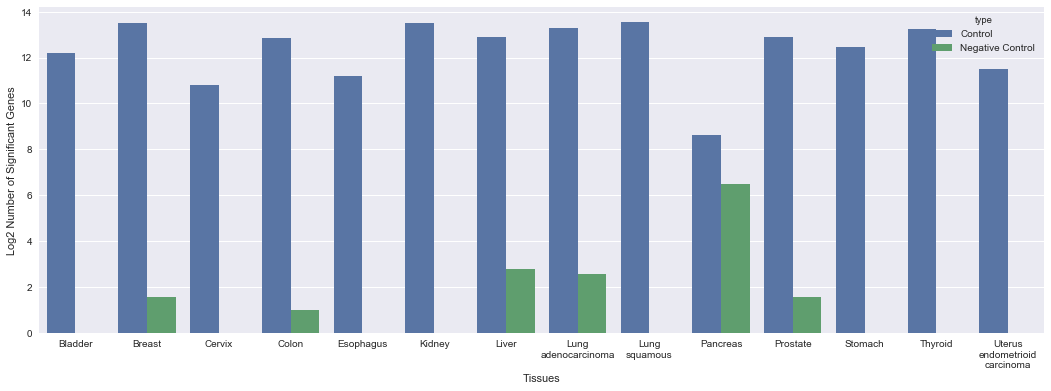

In [37]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot('tissues', 'sig_genes', hue='type', data=df, ax=ax)
plt.ylabel('Log2 Number of Significant Genes')
plt.xlabel('Tissues');

Probably worth repeating a couple times just to check for outliers.